In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
%cd /content/drive/MyDrive/cs7643/mtg-jamendo-dataset/

/content/drive/MyDrive/cs7643/mtg-jamendo-dataset


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [55]:
import librosa

In [57]:
data_file = "data/autotagging_moodtheme.tsv"

In [58]:
longest_row = 0
headers = []
with open(data_file, 'r') as f:
  lines = f.readlines()
  headers = lines[0].split('\t')
  for l in lines:
    lenrow = len(l.split('\t')) + 1
    if lenrow > longest_row:
      longest_row = lenrow
longest_row

14

In [59]:
headers = [h.strip() for h in headers]
headers

['TRACK_ID', 'ARTIST_ID', 'ALBUM_ID', 'PATH', 'DURATION', 'TAGS']

In [60]:
additional_column_names = ["TAGS" + str(i - 4) for i in range(len(headers), longest_row)]
additional_column_names

['TAGS2', 'TAGS3', 'TAGS4', 'TAGS5', 'TAGS6', 'TAGS7', 'TAGS8', 'TAGS9']

In [61]:
col_names = headers + additional_column_names
col_names

['TRACK_ID',
 'ARTIST_ID',
 'ALBUM_ID',
 'PATH',
 'DURATION',
 'TAGS',
 'TAGS2',
 'TAGS3',
 'TAGS4',
 'TAGS5',
 'TAGS6',
 'TAGS7',
 'TAGS8',
 'TAGS9']

In [62]:
df = pd.read_csv(data_file, sep='\t', names=col_names)

In [63]:
df.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,TAGS,TAGS2,TAGS3,TAGS4,TAGS5,TAGS6,TAGS7,TAGS8,TAGS9
0,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,TAGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,track_0000948,artist_000087,album_000149,48/948.mp3,212.7,mood/theme---background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,track_0000950,artist_000087,album_000149,50/950.mp3,248.0,mood/theme---background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,track_0000951,artist_000087,album_000149,51/951.mp3,199.7,mood/theme---background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,track_0002165,artist_000326,album_000347,65/2165.mp3,229.0,mood/theme---film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
moods = dict()
for i in range(len(headers) - 1, longest_row):
  for j in range(len(df)):
    col = df.columns[i]
    mood = df.iloc[j][col]
    if type(mood) == str and "mood" in mood:
      g = mood.split("---")[-1]
      if g in moods:
        moods[g] += 1
      else:
        moods.update({g : 1})

In [67]:
moods

{'background': 496,
 'film': 1502,
 'melancholic': 441,
 'calm': 457,
 'melodic': 1213,
 'children': 456,
 'meditative': 742,
 'cool': 251,
 'documentary': 612,
 'emotional': 1271,
 'relaxing': 1350,
 'love': 909,
 'drama': 424,
 'adventure': 448,
 'heavy': 156,
 'dark': 1202,
 'energetic': 1357,
 'retro': 213,
 'ballad': 334,
 'advertising': 673,
 'epic': 982,
 'action': 407,
 'dramatic': 317,
 'deep': 635,
 'inspiring': 877,
 'soft': 465,
 'fun': 480,
 'horror': 158,
 'funny': 203,
 'positive': 539,
 'sad': 749,
 'happy': 1657,
 'summer': 505,
 'dream': 951,
 'romantic': 627,
 'hopeful': 216,
 'groovy': 194,
 'space': 503,
 'soundscape': 480,
 'slow': 437,
 'sport': 297,
 'sexy': 122,
 'fast': 119,
 'nature': 259,
 'commercial': 428,
 'mellow': 154,
 'holiday': 176,
 'ambiental': 460,
 'uplifting': 693,
 'christmas': 623,
 'game': 261,
 'travel': 171,
 'motivational': 635,
 'party': 266,
 'upbeat': 444,
 'movie': 413,
 'powerful': 238,
 'corporate': 609,
 'trailer': 270}

In [68]:
counts = sorted(list(moods.items()), key=lambda x : x[1])
counts

[('fast', 119),
 ('sexy', 122),
 ('mellow', 154),
 ('heavy', 156),
 ('horror', 158),
 ('travel', 171),
 ('holiday', 176),
 ('groovy', 194),
 ('funny', 203),
 ('retro', 213),
 ('hopeful', 216),
 ('powerful', 238),
 ('cool', 251),
 ('nature', 259),
 ('game', 261),
 ('party', 266),
 ('trailer', 270),
 ('sport', 297),
 ('dramatic', 317),
 ('ballad', 334),
 ('action', 407),
 ('movie', 413),
 ('drama', 424),
 ('commercial', 428),
 ('slow', 437),
 ('melancholic', 441),
 ('upbeat', 444),
 ('adventure', 448),
 ('children', 456),
 ('calm', 457),
 ('ambiental', 460),
 ('soft', 465),
 ('fun', 480),
 ('soundscape', 480),
 ('background', 496),
 ('space', 503),
 ('summer', 505),
 ('positive', 539),
 ('corporate', 609),
 ('documentary', 612),
 ('christmas', 623),
 ('romantic', 627),
 ('deep', 635),
 ('motivational', 635),
 ('advertising', 673),
 ('uplifting', 693),
 ('meditative', 742),
 ('sad', 749),
 ('inspiring', 877),
 ('love', 909),
 ('dream', 951),
 ('epic', 982),
 ('dark', 1202),
 ('melodic', 1

In [70]:
total_moods = len(counts)
total_moods

59

In [126]:
how_many = 15

In [127]:
x = [x[0] for x in counts[:how_many]]
y = [x[1] for x in counts[:how_many]]

<BarContainer object of 15 artists>

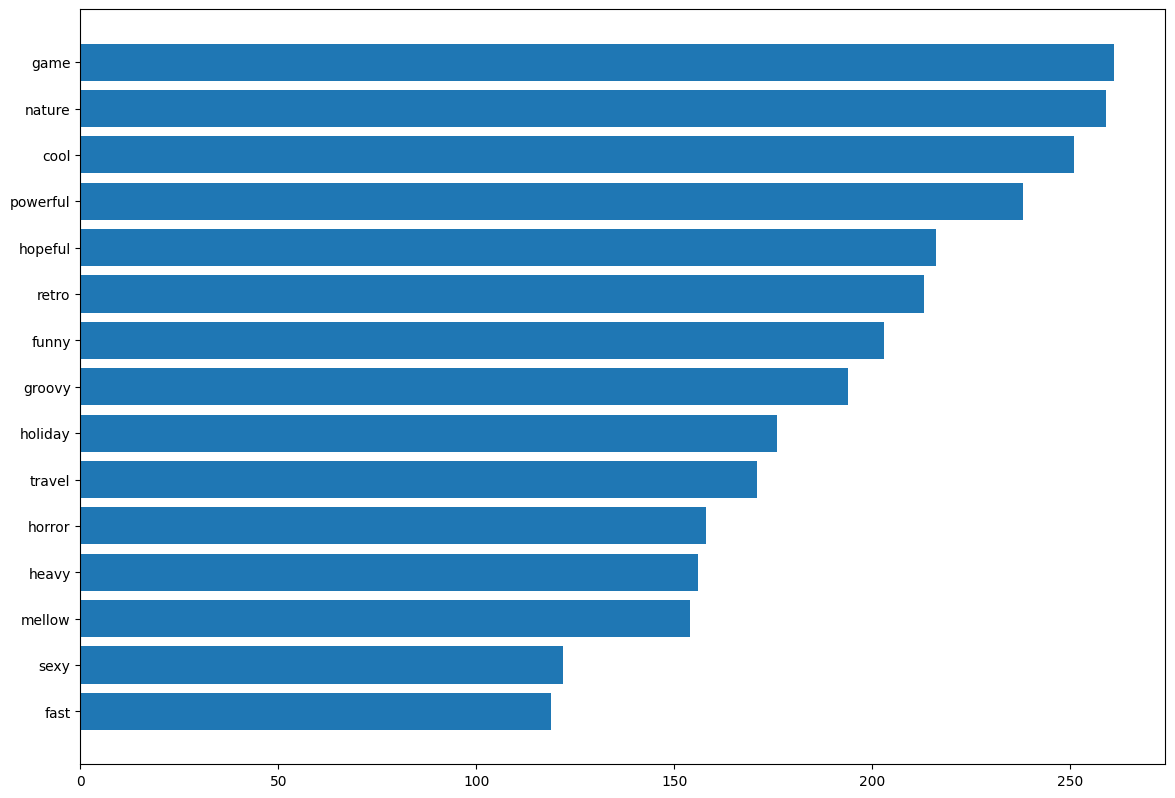

In [128]:
plt.figure(figsize=(14, 10), dpi=100)
plt.barh(x, y)
# plt.xticks(rotation=90)

In [116]:
from numpy.ma.extras import count_masked
def how_many_below(pct):
  total_songs = set()
  num = int(pct * total_moods) + 1
  print(num)
  rare = counts[:num]
  for mood in rare:
    print(mood)
    for i in range(len(df)):
      check = "mood/theme---" + str(mood[0])
      row = list(df.iloc[i])
      if check in list(df.iloc[i]):
        total_songs.add(row[3])
  return total_songs

In [117]:
total_songs = how_many_below(0.25)

15
('fast', 119)
('sexy', 122)
('mellow', 154)
('heavy', 156)
('horror', 158)
('travel', 171)
('holiday', 176)
('groovy', 194)
('funny', 203)
('retro', 213)
('hopeful', 216)
('powerful', 238)
('cool', 251)
('nature', 259)
('game', 261)


In [118]:
print(len(total_songs))

2751


In [119]:
sum([x[1] for x in counts[:15]])

2891

In [124]:
num_in_first = 0
soi = []
for j in range(6):
  print(j)
  for path in total_songs:
    check = "0" + str(j)
    comp = path.split("/")[0]
    if check == comp:
      num_in_first += 1
      soi.append(path)
num_in_first

0
1
2
3
4
5


189

In [125]:
soi

['00/1164200.mp3',
 '00/12100.mp3',
 '00/1295900.mp3',
 '00/985000.mp3',
 '00/1398500.mp3',
 '00/1210700.mp3',
 '00/818600.mp3',
 '00/1339600.mp3',
 '00/506100.mp3',
 '00/390000.mp3',
 '00/16000.mp3',
 '00/1052800.mp3',
 '00/699100.mp3',
 '00/1330500.mp3',
 '00/1125400.mp3',
 '00/1319500.mp3',
 '00/1337800.mp3',
 '00/1277700.mp3',
 '00/1069400.mp3',
 '00/1371800.mp3',
 '00/1079400.mp3',
 '00/1062500.mp3',
 '00/1168500.mp3',
 '00/757500.mp3',
 '00/468500.mp3',
 '00/1381000.mp3',
 '00/1103000.mp3',
 '00/1189900.mp3',
 '00/759300.mp3',
 '00/913700.mp3',
 '00/1167300.mp3',
 '00/1226700.mp3',
 '00/1383900.mp3',
 '00/1288400.mp3',
 '00/80500.mp3',
 '01/16101.mp3',
 '01/1052801.mp3',
 '01/12101.mp3',
 '01/1121101.mp3',
 '01/986601.mp3',
 '01/1125001.mp3',
 '01/1086601.mp3',
 '01/1219101.mp3',
 '01/759301.mp3',
 '01/1018801.mp3',
 '01/824301.mp3',
 '01/1167301.mp3',
 '01/1380601.mp3',
 '01/661601.mp3',
 '01/1398501.mp3',
 '01/390001.mp3',
 '01/80501.mp3',
 '01/1125401.mp3',
 '01/399201.mp3',
 

In [135]:
inds = dict()
for i, mood in enumerate(counts[:int(0.25 * total_moods) + 1]):
  inds.update({mood[0] : i})
inds

{'fast': 0,
 'sexy': 1,
 'mellow': 2,
 'heavy': 3,
 'horror': 4,
 'travel': 5,
 'holiday': 6,
 'groovy': 7,
 'funny': 8,
 'retro': 9,
 'hopeful': 10,
 'powerful': 11,
 'cool': 12,
 'nature': 13,
 'game': 14}

In [149]:
def sudo_one_hot(df, soi, inds):
  mini_df = df[df['PATH'].isin(soi)]
  final = []
  for i in range(len(mini_df)):
    curr = np.zeros(len(inds))
    moods = list(mini_df.iloc[i])[5:]
    for theme in moods:
      if type(theme) == str and "mood" in theme:
        check = theme.split("---")[-1]
        if check in inds:
          curr[inds[check]] = 1
      else:
        break
    final.append(curr)
  return final

In [150]:
onehot = sudo_one_hot(df, soi, inds)

In [152]:
onehot[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

##Downloading (ignore)

In [111]:
import requests
import tarfile
import wget
import time
from io import BytesIO

In [114]:
def get_arr_from_tar(filename):
  arr = None
  tar = tarfile.open(filename)
  for member in tar.getmembers()[1:]:
      array_file = BytesIO()
      array_file.write(tar.extractfile(member).read())
      array_file.seek(0)
      arr = np.load(array_file)
  tar.close()
  return arr

In [112]:
def download(output_dir="moodtheme_melspecs"):
  start = time.time()
  for i in range(10):
    url = "https://cdn.freesound.org/mtg-jamendo/autotagging_moodtheme/melspecs/autotagging_moodtheme_melspecs-0" + str(i) + ".tar"
    print(url)
    r = wget.download(url)
    arr = get_arr_from_tar(r)
    print(arr.shape)
    print(time.time() - start)

In [ ]:
download()